In [1]:
import re
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')
#Importing the String module
import string
from nltk.corpus import stopwords

In [2]:
def extract_frequencies(filename):
    d = dict()
    with open(filename, "r") as f:
        for line in f:
            line = line.lower().rstrip().split(' ') # delete the blank at the end of the string
            for word in line:
                word = re.sub(r'\W+', '', word) # delete sth like', and ()'
                if word:
                    d[word] = d.get(word, 0) + 1
    return d

def dump(dic, filename):
    with open(filename, "w") as f:
        for k, v in dic.items():
            f.write("{},{}\n".format(k, v))

In [3]:
frequencies = extract_frequencies("mobydick.txt")

In [4]:
dump(frequencies, "frequencies.csv")

In [5]:
col=['word', 'frequency']
df = pd.read_csv("frequencies.csv",names=col,header=None)
df.head(5)

word  frequency
0   moby         80
1   dick         77
2     or        711
3    the      14321
4  whale        955

In [6]:
vocabulary_size = df.shape[0]
tokens_size = df['frequency'].sum()
print(f'Vocabulary size: {vocabulary_size:>7,}\nNumber of tokens: {tokens_size:,}')

Vocabulary size:  19,964
Number of tokens: 212,029


In [7]:
def plot_word_frequency(df, top_n):
    df.sort_values("frequency",inplace=True,ascending=False)
    df.head(top_n)
    labels = df.iloc[:top_n, 0]
    counts = df.iloc[:top_n, 1]
    plt.figure(figsize=(15,5))
    plt.title("Most Frequent Words in the Corpus")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plot = sns.barplot(labels,counts)
    return plot

<AxesSubplot:title={'center':'Most Frequent Words in the Corpus'}, xlabel='word', ylabel='frequency'>

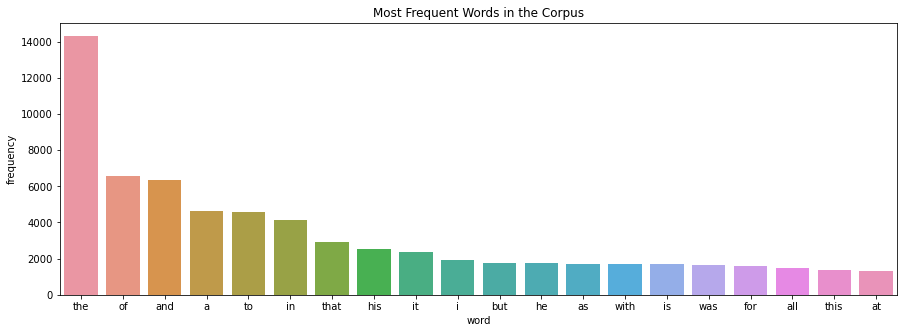

In [8]:
plot_word_frequency(df,20)

## Remove Stopwords

In [9]:
def extract_frequencies_stopwords(filename):
    d = dict()
    with open(filename, "r") as f:
        for line in f:
            line = line.lower().rstrip().split(' ') # delete the blank at the end of the string
            for word in line:
                word = re.sub(r'\W+', '', word) # delete sth like', and ()'
                if word not in stopwords.words("english"):
                    d[word] = d.get(word, 0) + 1
    return d

In [10]:
frequencies_plus = extract_frequencies_stopwords("mobydick.txt")

In [11]:
dump(frequencies_plus, "frequencies_plus.csv")

In [12]:
col=['word', 'frequency']
df_plus = pd.read_csv("frequencies_plus.csv",names=col,header=None)
df_plus.head()

word  frequency
0    moby         80
1    dick         77
2   whale        955
3     NaN       9014
4  herman          2

In [13]:
vocabulary_size_plus = df_plus.shape[0]
tokens_size_plus = df_plus['frequency'].sum()
print(f'Vocabulary size: {vocabulary_size_plus:>7,}\nNumber of tokens: {tokens_size_plus:,}')

Vocabulary size:  19,836
Number of tokens: 117,783


<AxesSubplot:title={'center':'Most Frequent Words in the Corpus'}, xlabel='word', ylabel='frequency'>

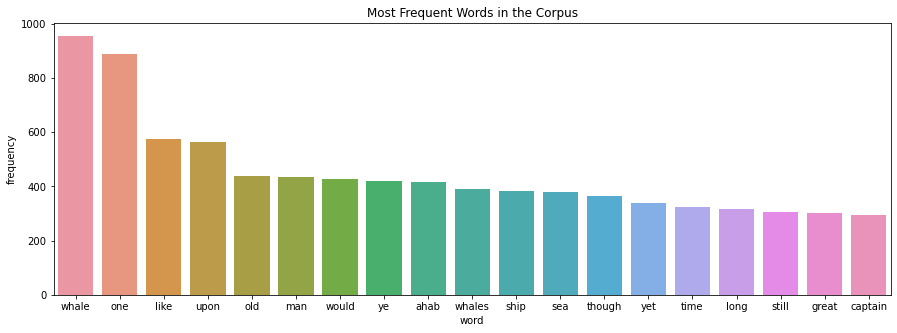

In [14]:
plot_word_frequency(df_plus,20)